# Q)2019.01~06 중 언제 지하철을 가장 많이 이용했을까?

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽어오기
f = pd.read_csv('subway_raw.csv')
df = pd.DataFrame(f)
df.head()



,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-01-01,화요일,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
1,2019-01-01,화요일,3호선,을지로3가,8104.0,7554.0,15658.0,2019-01,01-01,20190104
2,2019-01-01,화요일,2호선,을지로입구,22478.0,21330.0,43808.0,2019-01,01-01,20190104
3,2019-01-01,화요일,2호선,시청,8381.0,6049.0,14430.0,2019-01,01-01,20190104
4,2019-01-01,화요일,6호선,동묘앞,8045.0,8504.0,16549.0,2019-01,01-01,20190104


In [20]:
! pip install koreanize_matplotlib

In [9]:
df

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-01-01,월,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
1,2019-01-01,월,3호선,을지로3가,8104.0,7554.0,15658.0,2019-01,01-01,20190104
2,2019-01-01,월,2호선,을지로입구,22478.0,21330.0,43808.0,2019-01,01-01,20190104
3,2019-01-01,월,2호선,시청,8381.0,6049.0,14430.0,2019-01,01-01,20190104
4,2019-01-01,월,6호선,동묘앞,8045.0,8504.0,16549.0,2019-01,01-01,20190104
...,...,...,...,...,...,...,...,...,...,...
107023,2019-06-30,토,7호선,마들,6622.0,6116.0,12738.0,2019-06,06-30,20190703
107024,2019-06-30,토,4호선,노원,14071.0,14702.0,28773.0,2019-06,06-30,20190703
107025,2019-06-30,토,7호선,중계,9516.0,8981.0,18497.0,2019-06,06-30,20190703
107026,2019-06-30,토,7호선,하계,11645.0,11121.0,22766.0,2019-06,06-30,20190703


In [21]:
import koreanize_matplotlib

In [131]:
grouped = df.groupby('월일') # 몇월 몇일인지까지 알아야 하므로 월일로 그룹핑함
result = grouped['승하차총승객수'].agg(['mean','var','max','min','sum']) # 평균값, 분산, 최대값, 최소값, 총합 확인
sum1 = grouped['승하차총승객수'].sum()
aver = sum1.mean()



dictSum = dict(sum1)
sorted_sum = sorted(dictSum.items(), key=lambda item:item[1], reverse=True)
top_5 = sorted_sum[:5]


print(top_5)
print(aver)


[('05-03', 18425509.0), ('05-10', 18297824.0), ('05-24', 18107448.0), ('05-17', 18085208.0), ('04-12', 17992610.0)]
14851595.38674033


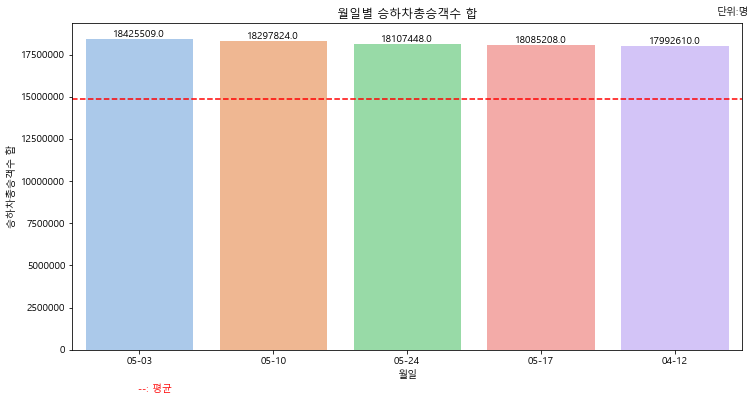

In [143]:
fig, ax = plt.subplots(figsize=(12, 6))

top_5_keys = [i[0] for i in top_5]
top_5_values = [i[1] for i in top_5]
sns.barplot(x=top_5_keys, y=top_5_values, palette = 'pastel')
# sns.pointplot(x=top_5_keys, y=top_5_values)
plt.ticklabel_format(style='plain', axis='y')
plt.title('월일별 승하차총승객수 합')
plt.xlabel('월일')
plt.ylabel('승하차총승객수 합')
plt.text(1.01, 1.05, '단위:명', ha='right', va='top', transform=plt.gca().transAxes)
plt.axhline(y = aver, color = 'red', linestyle = '--')
plt.text(-0.01, -2500000, '--: 평균', color='red')
for i, v in enumerate(top_5_values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')




In [123]:
# 막대 그래프를 통한 시각화
''''import seaborn as sns
top_5_keys = [i[0] for i in top_5]
top_5_values = [i[1] for i in top_5]

colors = sns.color_palette('viridis', len(top_5_keys))

fig = plt.figure(figsize=(12,6)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정

plt.bar(top_5_keys,top_5_values,color=colors)
plt.title('상위 5일별 승하차총승객수 합')
plt.rc('font',family='malgun gothic')
plt.xlabel('월일')
plt.ylabel('승하차총승객수 합')
plt.text(1.01, 1.05, '단위:천명', ha='right', va='top', transform=plt.gca().transAxes)
for i in range(len(top_5_keys)):
    plt.text(top_5_keys[i], top_5_values[i], '{:.1f}'.format(top_5_values[i]), ha='center', va='bottom')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()'''

"'import seaborn as sns\ntop_5_keys = [i[0] for i in top_5]\ntop_5_values = [i[1] for i in top_5]\n\ncolors = sns.color_palette('viridis', len(top_5_keys))\n\nfig = plt.figure(figsize=(12,6)) ## Figure 생성 \nfig.set_facecolor('white') ## Figure 배경색 지정\n\nplt.bar(top_5_keys,top_5_values,color=colors)\nplt.title('상위 5일별 승하차총승객수 합')\nplt.rc('font',family='malgun gothic')\nplt.xlabel('월일')\nplt.ylabel('승하차총승객수 합')\nplt.text(1.01, 1.05, '단위:천명', ha='right', va='top', transform=plt.gca().transAxes)\nfor i in range(len(top_5_keys)):\n    plt.text(top_5_keys[i], top_5_values[i], '{:.1f}'.format(top_5_values[i]), ha='center', va='bottom')\nplt.xticks(rotation=45) \n\nplt.tight_layout()\nplt.show()"

### 2019.05.03에 가장 많다. 상위 5개 데이터 중 4개가 5월인 것으로 봤을 때, 5월에 지하철 승하차가 많이 일어나는 달임을 알 수 있다. 저 날들에 무슨 일이 있었을까?

# 목요일에 지하철 승객수가 가장 많을까? (요일 수정 후)


In [125]:
day = df.groupby('요일')
result = day['승하차총승객수'].agg(['mean','var','max','min','sum','count'])
result

,mean,var,max,min,sum,count
요일,,,,,,
금요일,28959.531573,8.660484e+08,270553.0,1.0,445310717.0,15377
목요일,27869.222663,7.730117e+08,254030.0,1.0,428684383.0,15382
수요일,27397.966040,7.467514e+08,249613.0,1.0,421134136.0,15371
월요일,26474.344219,7.011286e+08,242619.0,1.0,391555551.0,14790
일요일,16116.941985,3.068965e+08,226301.0,1.0,247523995.0,15358
토요일,22249.334244,5.995762e+08,261866.0,1.0,341950018.0,15369
화요일,26784.992198,7.311647e+08,247257.0,1.0,411979965.0,15381


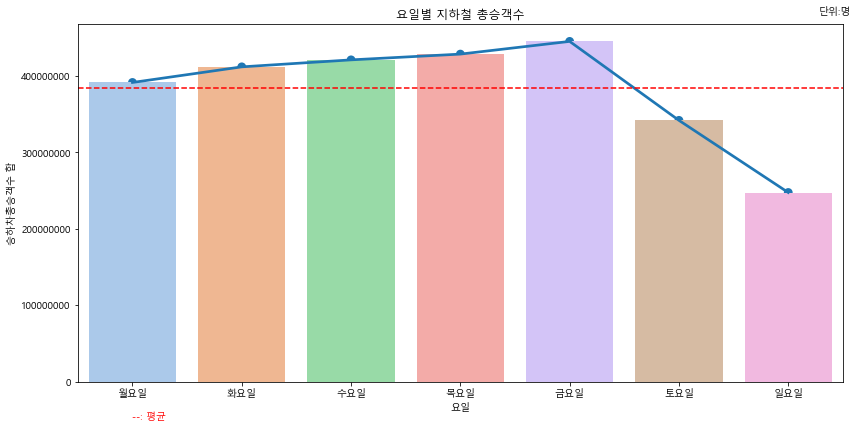

In [145]:
week = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
sum_of_day = day['승하차총승객수'].sum().reindex(week)
avg_of_day = sum_of_day.mean()

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=sum_of_day.index, y=sum_of_day, palette = 'pastel')
sns.pointplot(x=sum_of_day.index, y=sum_of_day)

plt.title('요일별 지하철 총승객수')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.xlabel('요일')
plt.ylabel('승하차총승객수 합')
plt.ticklabel_format(style='plain', axis='y')
plt.axhline(y = avg_of_day, color = 'red', linestyle = '--')
plt.text(0, -50000000, '--: 평균', color='red')
plt.text(1.01, 1.05, '단위:명', ha='right', va='top', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

## ===요일과 승하차총승객수의 관계로 ols를 돌려보았는데 단순히 요일이랑 승객수랑의 관계를 보는 것은 무의미 한 거 같고 추후에 요일별 승객수와의 관계로 보는 등 발전시킬 수 있는지 궁금===

In [73]:
import statsmodels.api as sm
day_mapping = {'월요일': 1, '화요일': 2, '수요일': 3, '목요일': 4, '금요일': 5, '토요일': 6, '일요일': 7}
y = df['승하차총승객수']
X = df['요일'].map(day_mapping)
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())





                            OLS Regression Results                            
Dep. Variable:                승하차총승객수   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1198.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          5.73e-261
Time:                        23:32:24   Log-Likelihood:            -1.2406e+06
No. Observations:              107028   AIC:                         2.481e+06
Df Residuals:                  107026   BIC:                         2.481e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.069e+04    179.915    170.599      0.0

### =========================

In [67]:
df_week = pd.pivot_table(df,index='요일',values='승하차총승객수',aggfunc='sum') 
df_week.sort_values(by='승하차총승객수',ascending=False)

,승하차총승객수
요일,
금요일,445310717.0
목요일,428684383.0
수요일,421134136.0
화요일,411979965.0
월요일,391555551.0
토요일,341950018.0
일요일,247523995.0


#### 금요일에 승객이 제일 많다.

# 연월일 별 승하차총승객수 그래프(pointplot)

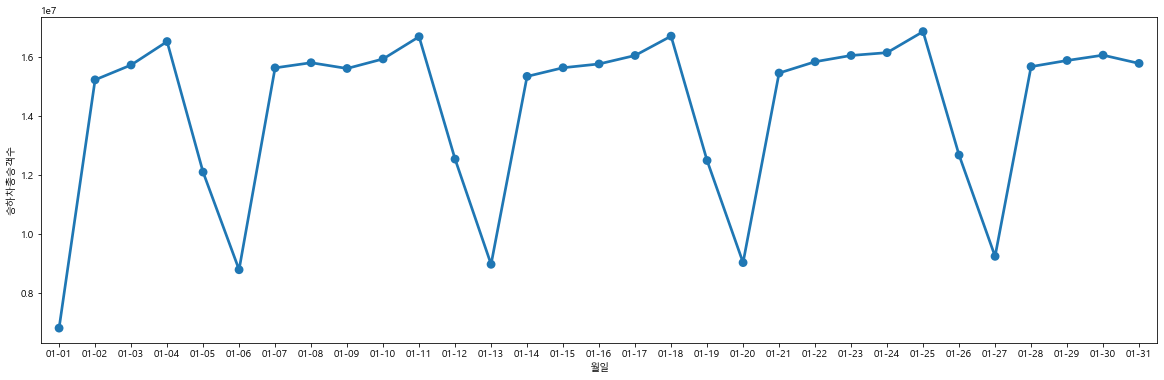

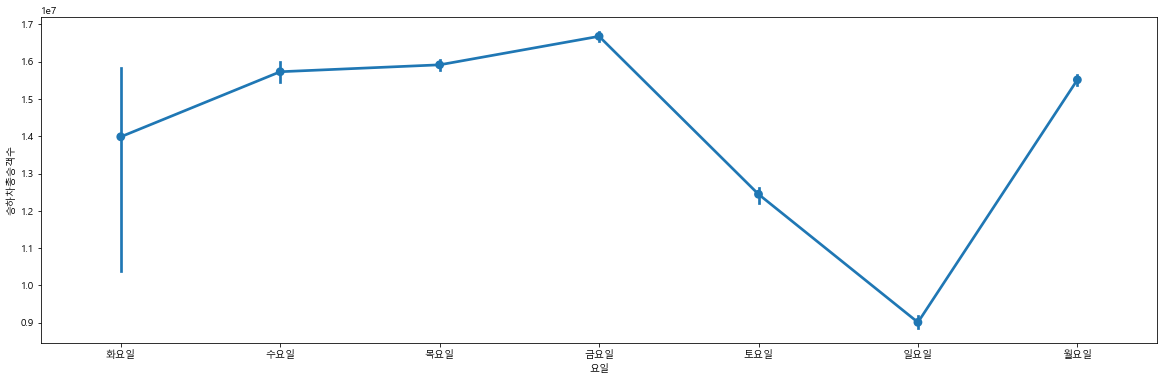

In [147]:
# 2019.1월에 대한 pointplot
import seaborn as sns
import matplotlib.pyplot as plt

df_month_day = df[df['연월']=='2019-01']
df_month_day_pivot = pd.pivot_table(df_month_day,index=['월일','요일'],values='승하차총승객수',aggfunc='sum')
df_month_day_pivot = df_month_day_pivot.reset_index()

plt.rc('font', family='Malgun Gothic')
fig, ax = plt.subplots( figsize=(20,6) )
sns.pointplot(data = df_month_day_pivot, x='월일',y='승하차총승객수')
fig, ax = plt.subplots( figsize=(20,6) )
sns.pointplot(data = df_month_day_pivot, x = '요일', y = '승하차총승객수')

In [148]:
df['연월'].unique()

array(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06'],
      dtype=object)

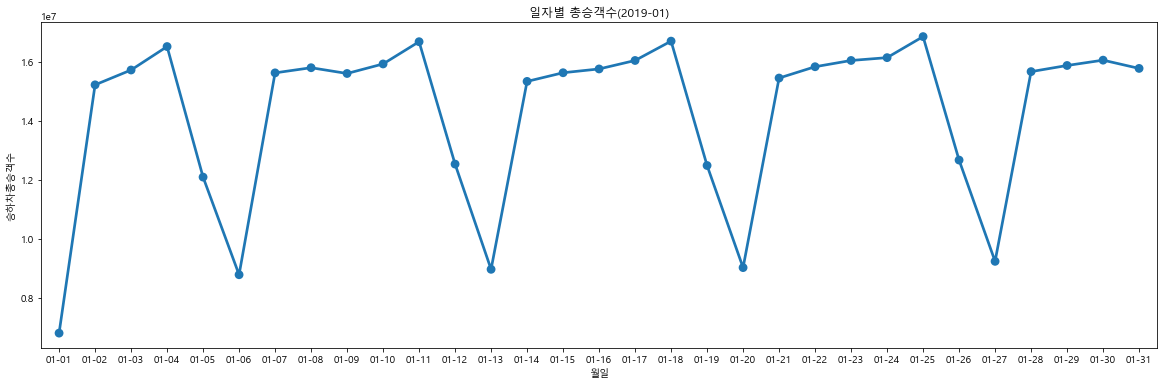

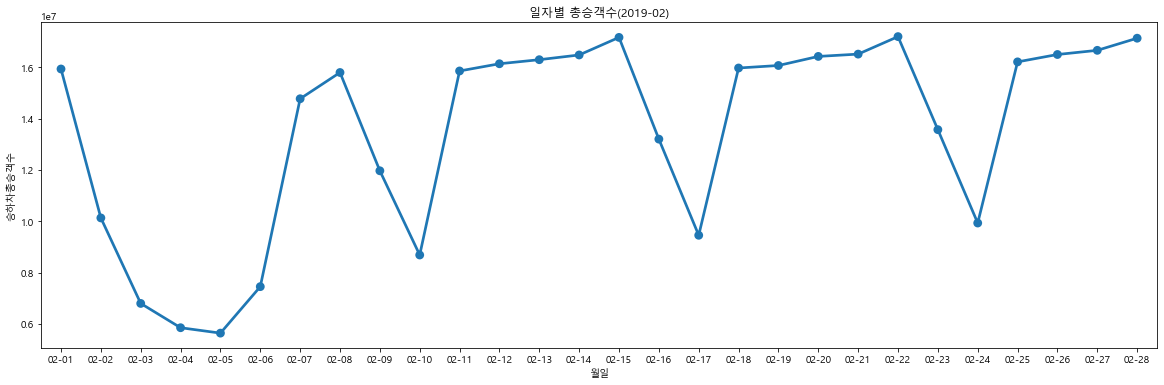

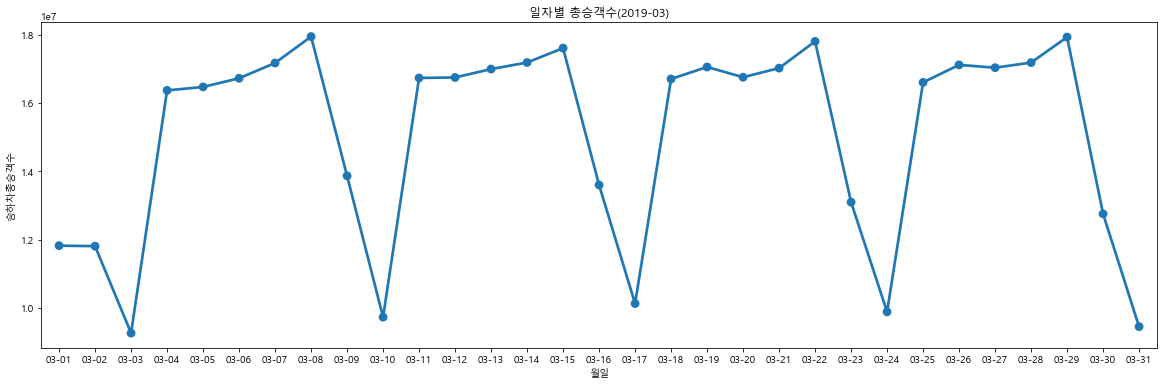

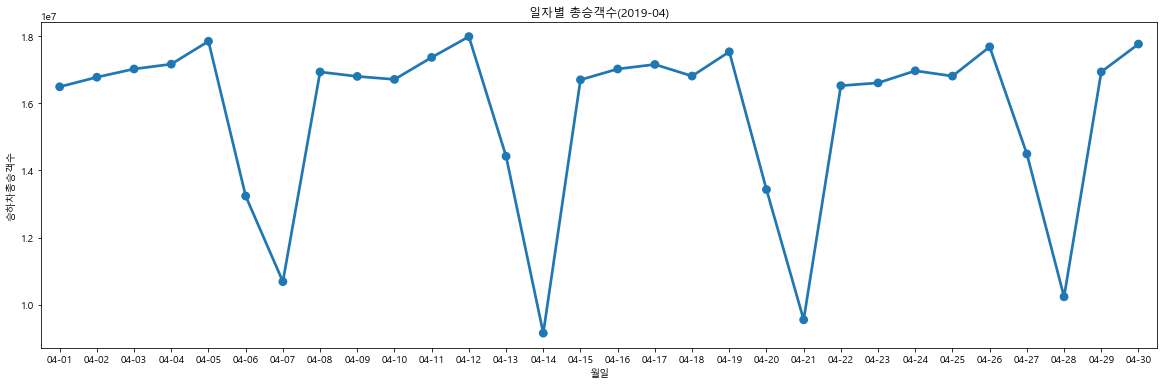

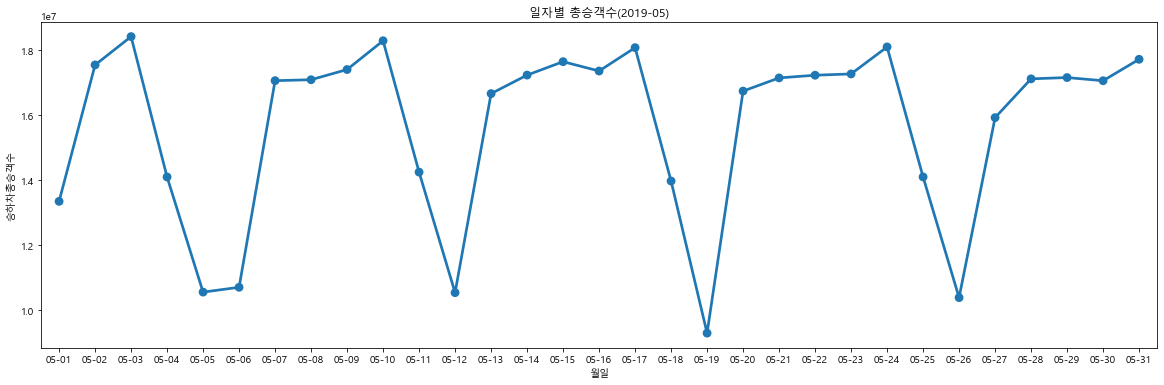

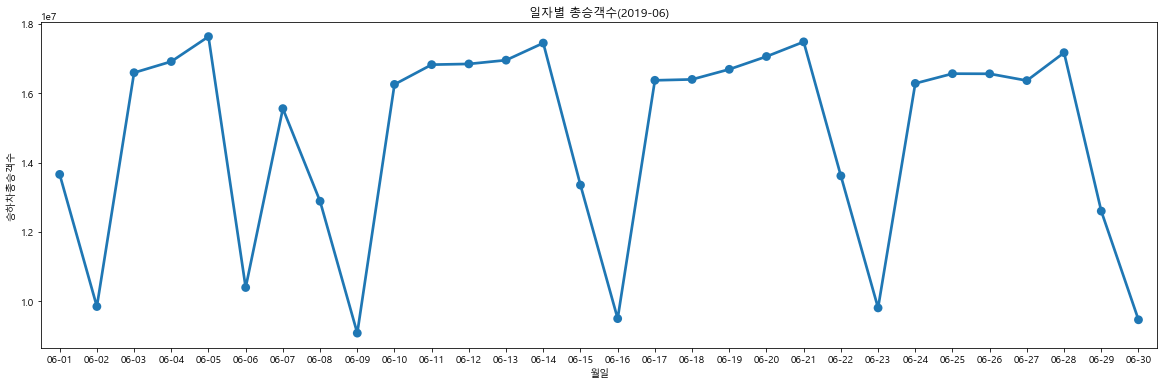

In [149]:
# 월일별 pointplot
for year_month in df['연월'].unique():
    df_month_day = df[df['연월']==year_month]
    df_month_day_pivot = pd.pivot_table(df_month_day,index=['월일','요일'],values='승하차총승객수',aggfunc='sum')
    df_month_day_pivot = df_month_day_pivot.reset_index()
    
    fig, ax = plt.subplots(figsize=(20,6))
    ax.set_title(f'일자별 총승객수({year_month})')
    sns.pointplot(data=df_month_day_pivot,x='월일',y='승하차총승객수')

### 그래프를 통해 보면 일주일 중 일요일에 승객수가 가장 적고 금요일에 가장 많은 패턴을 띄는 것으로 보임(예외:공휴일)

# 가장 승객이 많이 타는 지하철역(승차역)은 어디일까?

In [158]:
df_station = pd.pivot_table(df,index='역명',values='승차총승객수',aggfunc=['sum','count','mean']) 
df_station.columns = ['승차총승객수_합','관측 수', '승차총승객수_평균']
df_station.sort_values(by='승차총승객수_합',ascending=False)



,승차총승객수_합,관측 수,승차총승객수_평균
역명,,,
잠실,18574323.0,362,51310.284530
강남,18148024.0,181,100265.325967
고속터미널,17541287.0,543,32304.395948
홍대입구,17270084.0,546,31630.190476
서울역,17165598.0,967,17751.394002
...,...,...,...
신원,43013.0,181,237.640884
백양리,34193.0,181,188.911602
굴봉산,34051.0,181,188.127072


### 승차객이 가장 많은 곳은 잠실역. 강남이 평균적으로 많은 것은 잠실과 관측수가 2배 정도 차이가 나기 때문. 
### raw data 확인 결과 같은 날 중복되는 데이터(환승? 호선 겹침?)가 잠실이 더 많음. 
### 이 지점을 신경쓰지 않기 위해서는 평균보단 합계값을 사용하는 것이 좋아보임!

In [169]:
df_station_top10 = df_station.sort_values(by='승차총승객수_합',ascending=False).head(10) # 상위 10개역만 보자
df_station_top10.head()

,승차총승객수_합,관측 수,승차총승객수_평균
역명,,,
잠실,18574323.0,362,51310.284530
강남,18148024.0,181,100265.325967
고속터미널,17541287.0,543,32304.395948
홍대입구,17270084.0,546,31630.190476
서울역,17165598.0,967,17751.394002


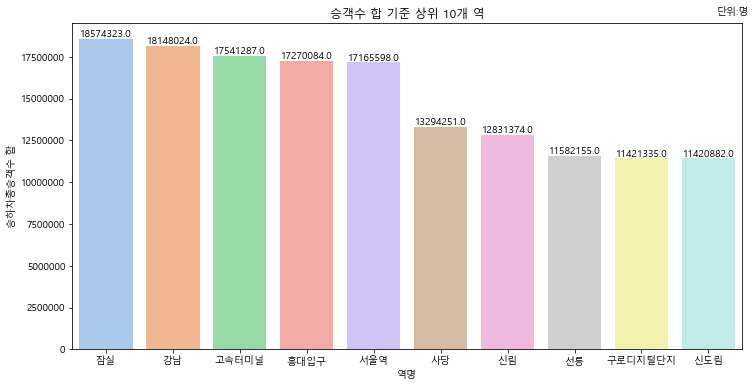

In [170]:
# 그래프를 통한 시각화
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=df_station_top10.index, y=df_station_top10['승차총승객수_합'].values, palette='pastel')
plt.title('승객수 합 기준 상위 10개 역')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.xlabel('역명')
plt.ylabel('승하차총승객수 합')
plt.text(1.01, 1.05, '단위:명', ha='right', va='top', transform=plt.gca().transAxes)
plt.ticklabel_format(style='plain', axis='y')
for i, v in enumerate(df_station_top10['승차총승객수_합'].values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

# 노선별 역별/요일별 승차승객수 비교


In [21]:
# 1호선의 역별/요일별 승차승객수
line = '1호선'
station_line = df[df['노선명']==line]

df_line = pd.pivot_table(station_line,index='역명',columns = '요일',values='승차총승객수',aggfunc='sum') 
df_line = df_line[['월','화','수','목','금','토','일']]
df_line = df_line / 10000 # 자연로그e가 단위면 heatmap이 잘 안 보임
df_line

요일,월,화,수,목,금,토,일
역명,,,,,,,
가능,20.1352,20.4871,20.5504,21.0822,17.1506,13.0598,19.5014
가산디지털단지,176.6536,177.8368,181.0008,181.5630,70.2145,53.7274,170.1356
간석,18.7924,19.0623,19.3590,19.8267,14.9820,10.8544,18.0042
개봉,67.6404,69.3763,69.9967,70.7829,59.0186,42.4710,64.6682
관악,24.0166,24.1250,24.6655,24.9150,20.5029,17.0350,22.6010
...,...,...,...,...,...,...,...
천안,20.3687,19.7940,20.2192,21.2618,21.7917,19.8199,19.2038
평택,36.2924,36.6562,36.8212,40.9744,41.8802,35.2111,35.4455
화서,24.3416,24.6162,24.9174,25.1427,19.0783,13.9239,23.2385


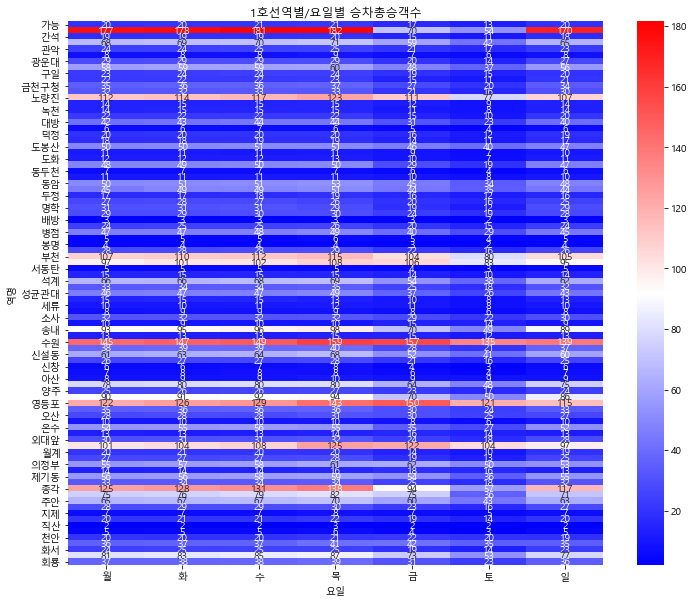

In [22]:
# 1호선에 대한 heatmap
import matplotlib.pyplot as plt
import seaborn as sns 

fig, ax = plt.subplots(figsize = (12,10))
plt.title(f'{line}역별/요일별 승차총승객수')
plt.rc('font', family='Malgun Gothic')
sns.heatmap(df_line,annot=True,fmt='.0f',cmap='bwr')

In [23]:
df['노선명'].unique()

array(['2호선', '3호선', '6호선', '경의선', '1호선', '4호선', '7호선', '분당선', '인천선',
       '경춘선', '수인선', '신분당선', '경강선', '5호선', '8호선', '9호선', '인천2호선', '공항철도',
       '우이신설경전철'], dtype=object)

In [24]:
# 1호선~9호선까지 리스트 생성
line_list = []
for line in df['노선명'].unique():
    if line[1:] == '호선':
        line_list.append(line)
line_list.sort()
line_list

['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선']

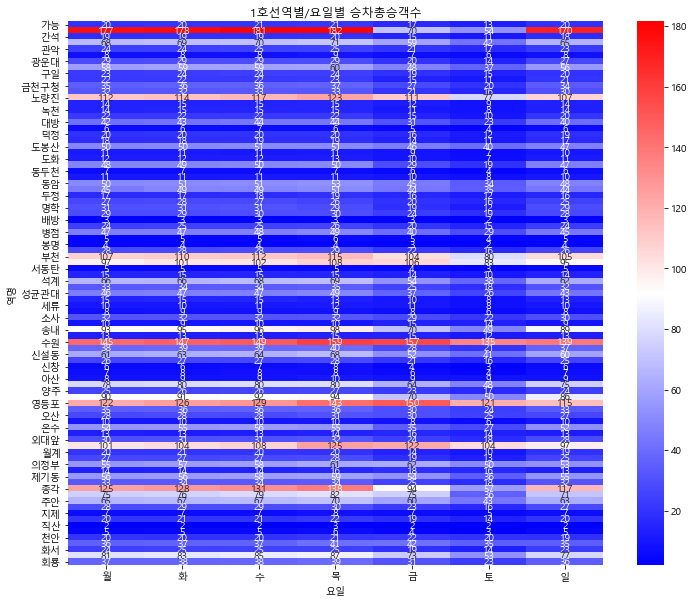

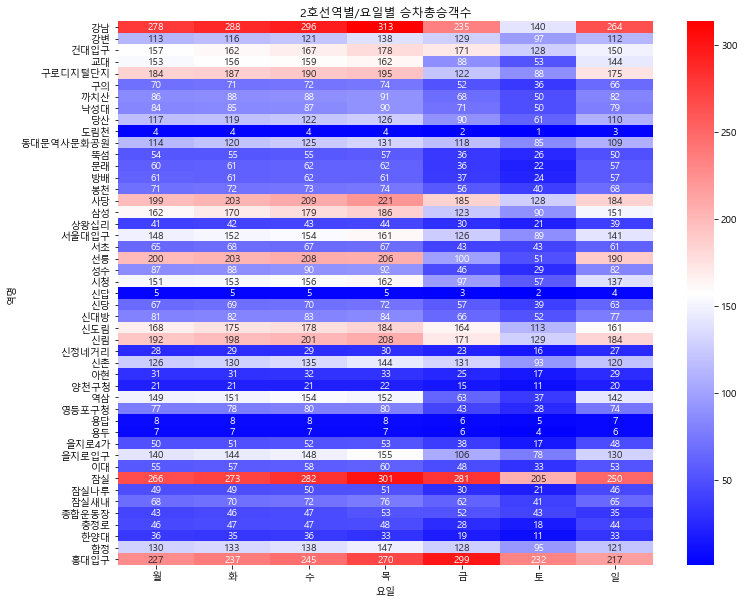

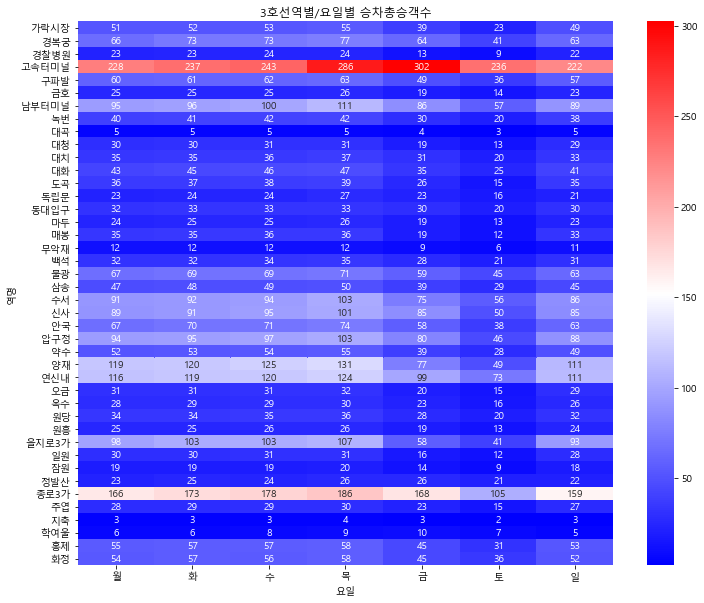

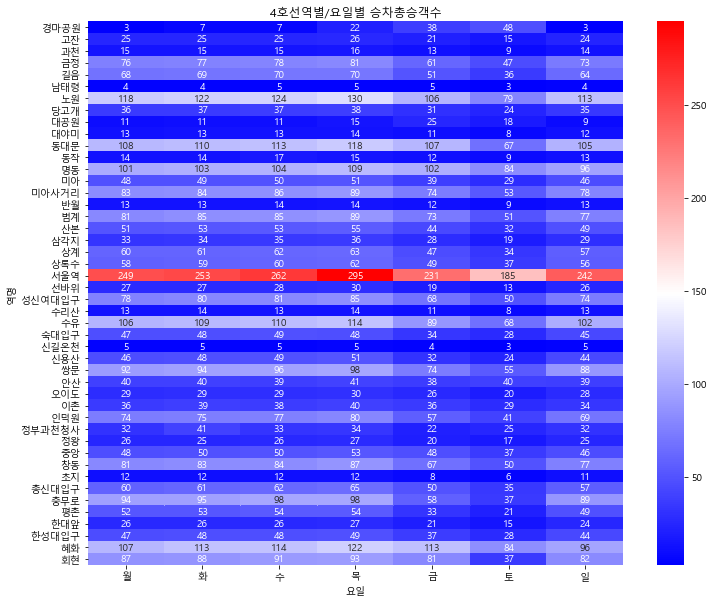

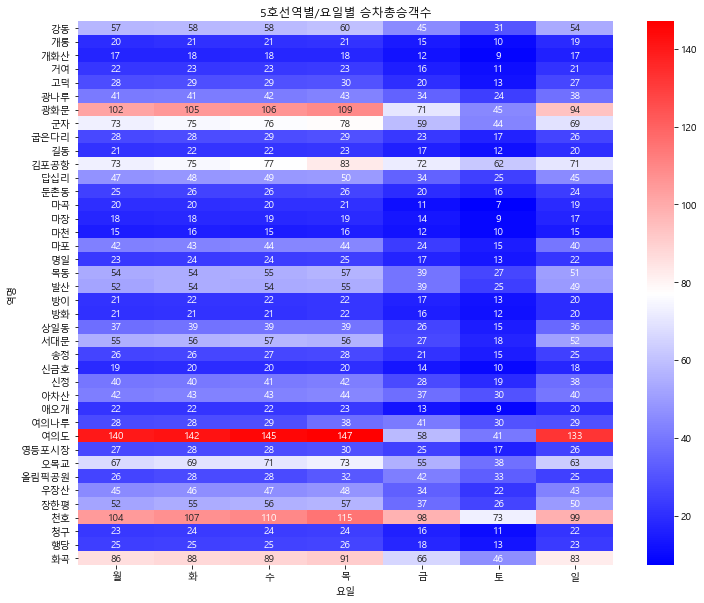

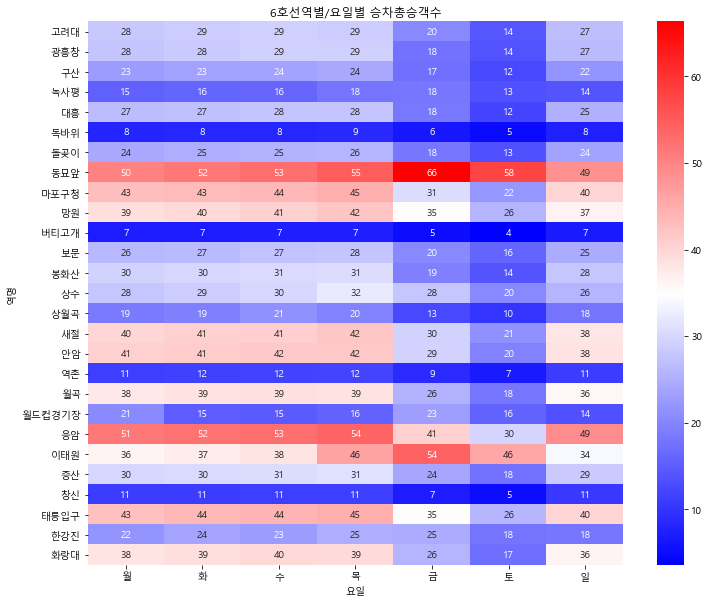

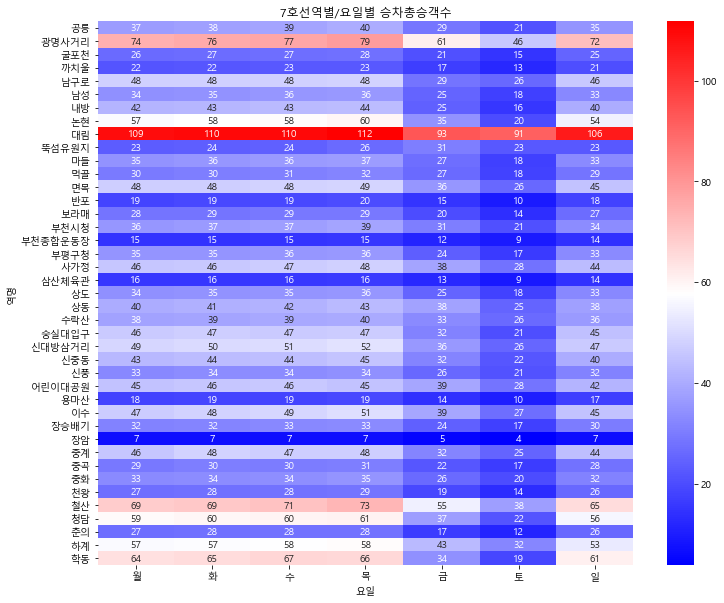

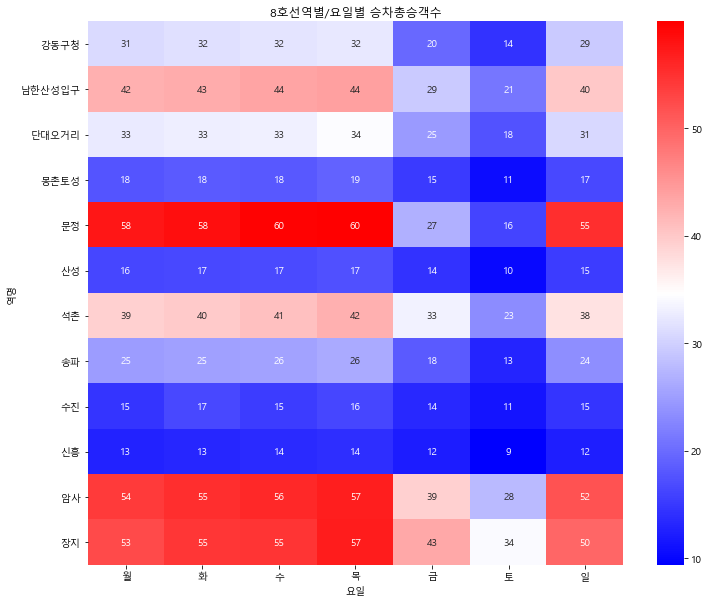

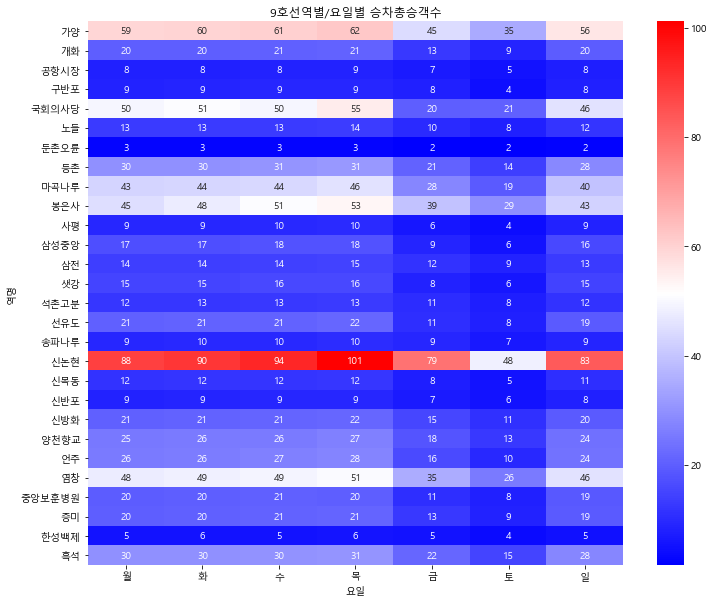

In [25]:
# 1호선~9호선까지 heatmap 생성
for line in line_list:
    station_line = df[df['노선명']==line]
    df_line = pd.pivot_table(station_line,index='역명',columns = '요일',values='승차총승객수',aggfunc='sum') 
    df_line = df_line[['월','화','수','목','금','토','일']]
    df_line = df_line / 10000 # 자연로그e가 단위면 heatmap이 잘 안 보임. 
    
    fig, ax = plt.subplots(figsize = (12,10))
    plt.title(f'{line}역별/요일별 승차총승객수')
    plt.rc('font', family='Malgun Gothic')
    sns.heatmap(df_line,annot=True,fmt='.0f',cmap='bwr')

# 1호선에서 가장 하차승객수가 많은 역은 어디일까?

In [171]:
one_metro = df[df['노선명']=='1호선'] # df 항목 컬럼 값이 1호선인 것만 추출
grouped = one_metro.groupby('역명')['하차총승객수'].sum().nlargest(10) # 하차총승객수 상위 10개역 추출
grouped

역명
가산디지털단지    10571381.0
수원         10226609.0
영등포         9432067.0
용산          7817685.0
노량진         7603258.0
부평          7531774.0
종각          7517515.0
부천          7412269.0
송내          5807791.0
역곡          5559994.0
Name: 하차총승객수, dtype: float64

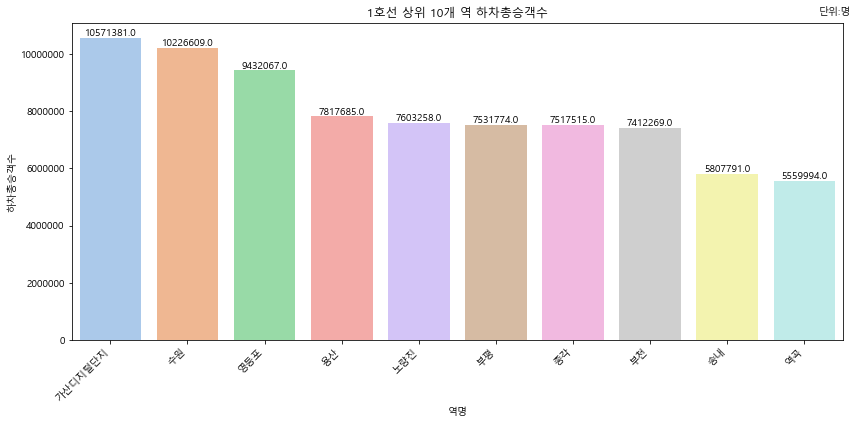

In [181]:
# barplot를 통한 시각화
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=grouped.index, y=grouped.values, palette="pastel")
plt.title('1호선 상위 10개 역 하차총승객수')
plt.xlabel('역명')
plt.ylabel('하차총승객수')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.text(1.01, 1.05, '단위:명', ha='right', va='top', transform=plt.gca().transAxes)
for i, v in enumerate(grouped.values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()


#### 1호선역 중 하차승객수가 가장 많은 역은 가산디지털단지역

# 2호선 중 어느역에서 승차가 가장 많이 발생할까?(Folium을 활용)

In [4]:
geo = pd.read_csv('지하철노선위경도정보2.csv')
geo = geo.rename({'역이름':'역명','호선':'노선명'},axis='columns')
geo.head()

,역명,역지역,위도,경도,노선명
0,낙성대,수도권,37.477090,126.963506,2호선
1,구룡,수도권,37.487027,127.059475,분당선
2,서울대입구,수도권,37.481284,126.952695,2호선
3,불광,수도권,37.610044,126.930302,3호선
4,월롱,수도권,37.796204,126.792563,경의선


In [5]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-01-01,월,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
1,2019-01-01,월,3호선,을지로3가,8104.0,7554.0,15658.0,2019-01,01-01,20190104
2,2019-01-01,월,2호선,을지로입구,22478.0,21330.0,43808.0,2019-01,01-01,20190104
3,2019-01-01,월,2호선,시청,8381.0,6049.0,14430.0,2019-01,01-01,20190104
4,2019-01-01,월,6호선,동묘앞,8045.0,8504.0,16549.0,2019-01,01-01,20190104


In [7]:
two_metro = geo[geo['노선명']=='2호선'] # geo 항목 컬럼 값이 2호선인 것만 추출
seoul_two_metro = two_metro[two_metro['역지역']=='수도권'] # 서울 2호선만 추출
seoul_two_metro.head(10)

,역명,역지역,위도,경도,노선명
0,낙성대,수도권,37.477090,126.963506,2호선
2,서울대입구,수도권,37.481284,126.952695,2호선
7,강변,수도권,37.535118,127.094723,2호선
8,영등포구청,수도권,37.525831,126.896668,2호선
10,잠실새내,수도권,37.511608,127.086301,2호선
11,당산,수도권,37.534774,126.902607,2호선
13,충정로,수도권,37.559748,126.964484,2호선
15,종합운동장,수도권,37.511130,127.073836,2호선
16,합정,수도권,37.549901,126.914447,2호선
18,홍대입구,수도권,37.556864,126.923765,2호선


In [8]:
geo_df = pd.merge(df,seoul_two_metro,how='inner',on='역명') #
geo_df

,사용일자,요일,노선명_x,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자,역지역,위도,경도,노선명_y
0,2019-01-01,월,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104,수도권,37.566637,126.997623,2호선
1,2019-01-01,월,2호선,을지로4가,1406.0,1867.0,3273.0,2019-01,01-01,20190104,수도권,37.566637,126.997623,2호선
2,2019-01-02,화,2호선,을지로4가,13390.0,13451.0,26841.0,2019-01,01-02,20190105,수도권,37.566637,126.997623,2호선
3,2019-01-02,화,2호선,을지로4가,5816.0,6263.0,12079.0,2019-01,01-02,20190105,수도권,37.566637,126.997623,2호선
4,2019-01-03,수,2호선,을지로4가,14046.0,14029.0,28075.0,2019-01,01-03,20190106,수도권,37.566637,126.997623,2호선
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13754,2019-06-26,화,2호선,까치산,34589.0,32605.0,67194.0,2019-06,06-26,20190629,수도권,37.532227,126.846426,2호선
13755,2019-06-27,수,2호선,까치산,33864.0,32026.0,65890.0,2019-06,06-27,20190630,수도권,37.532227,126.846426,2호선
13756,2019-06-28,목,2호선,까치산,34977.0,32541.0,67518.0,2019-06,06-28,20190701,수도권,37.532227,126.846426,2호선
13757,2019-06-29,금,2호선,까치산,25125.0,23565.0,48690.0,2019-06,06-29,20190702,수도권,37.532227,126.846426,2호선


#### 을지로 4가는 왜 같은날 데이터가 2개 있는지 모르겠음